## counting the position and number of Citocine in a circular gene

In [ ]:
def SymbolArray(Genome, symbol):
    array = {} #TAKE DICT TO STORE THE POSITION OF THE GENOME AND THE REPEATED COUNT 
    n = len(Genome) # LEN OF GENOME 
    ExtendedGenome = Genome + Genome[0:n//2] # TO MAKE THE DNA CIRCULAR WE ADD THE FIRST HALF WITH THE LAST
    for i in range(n):
        #LOOP FOR N TIMES 
        array[i] = PatternCount(symbol, ExtendedGenome[i:i+(n//2)])
        
    return array
###########################################################################
def PatternCount (pattern , sequence):
    k = len(pattern)
    count = 0
    for i in range (len(sequence) - k + 1):
        ###starts from 0 in the text and ends till the (length of sequence-k)
        ### as the limit in python is upto but not including, so we add 1 
        window = sequence[i:i+k]
        ### the size of the window is --> index to index+k 
        #print(window)
        if window == pattern:
            count = count+1
            
    #print(count)
    return count





r"""
-----------------------------------------------------------
Genome = "AAAAGGGG"
Symbol = "A"
{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}
------------------------------------------------------------
A A A A G G G G 
len = 8
circular dna len = 8 + [0:len/2]
circular Dna = A A A A G G G G A A A A
{0(A)A: 4 (A A A A), 
1(A): 3 (A A A g),
2(A): 2 (A A G G),
3(A): 1 (A G G G),
4(G): 0 (G G G G),
5(G): 1 (G G G A),
6(G): 2 (G G A A),
7(G): 3 (G A A A)}
r"""

In [ ]:
Genome = "AAAAGGGG"
Symbol = "A"
print(SymbolArray(Genome,Symbol))

######


In [ ]:
def FasterSymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]

    # look at the first half of Genome to compute first array value
    array[0] = PatternCount(symbol, Genome[0:n//2])
    print(array[0])
    print("\n")
    
    for i in range(1, n):
        # start by setting the current array value equal to the previous array value
        print(i)
        
        array[i] = array[i-1]
        
        print("assume array", i, "is: " , array[i])
        print(" array", i-1 ,"is: " , array[i-1])
        
        # the current array value can differ from the previous array value by at most 1
        print ("genome",   i ,"is:" ,ExtendedGenome[i])
        
        if ExtendedGenome[i-1] == symbol:
            print("genome",  i-1 ,"is ", ExtendedGenome[i-1])
            
            array[i] = array[i]-1
            
        if ExtendedGenome[i+(n//2)-1] == symbol:
            print("genome",  i+4-1 , "is" , ExtendedGenome[i+(n//2)-1])
            
            array[i] = array[i]+1
        
        print(array)
        print("\n")
        
    return array



################################################################################
r'''
To begin with, we use PatternCount just once, to measure how many bases (Symbol) are 
in the window stretching from index 0 to index n//2. Remember, as I did not - we are 
trying to keep track of half of the genome's C bases because we want to look at the 
DNA stretching from ori to ter, and wherever those two are, we know that they will 
be a half - genome's length apart. That means we have to look at the whole genome in 
half-genome sized windows until we find a leading and lagging strand.

if ExtendedGenome[i-1] == symbol:
## this asks if the base that just disappeared out of our moving 
window was the same as the base we're looking for##

   array[i] = array[i]-1
## if so, we remove one from the number of bases in the current window##

if ExtendedGenome[i+(n//2)-1] == symbol:
## this asks if the base that just came into 'front' of the moving window 
is the same as the base we're looking for##

array[i] = array[i]+1
## if so, we add one to the number of bases in the current window##

This means that each time the window moves, we remove any bases that have 'left' the window 
and add any that have 'entered'. This gives us a dictionary of each index position, 
and the sum of bases-of-interest leaving and entering, i.e. a live count of 
the number of bases in each window positi
r'''

#####################################
r'''
1
assume array 1 is:  4
 array 0 is:  4
genome 1 is: A
genome 0 is  A
{0: 4, 1: 3}


2
assume array 2 is:  3
 array 1 is:  3
genome 2 is: A
genome 1 is  A
{0: 4, 1: 3, 2: 2}


3
assume array 3 is:  2
 array 2 is:  2
genome 3 is: A
genome 2 is  A
{0: 4, 1: 3, 2: 2, 3: 1}


4
assume array 4 is:  1
 array 3 is:  1
genome 4 is: G
genome 3 is  A
{0: 4, 1: 3, 2: 2, 3: 1, 4: 0}


5
assume array 5 is:  0
 array 4 is:  0
genome 5 is: G
genome 8 is A
{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1}


6
assume array 6 is:  1
 array 5 is:  1
genome 6 is: G
genome 9 is A
{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2}


7
assume array 7 is:  2
 array 6 is:  2
genome 7 is: G
genome 10 is A
{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}


{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}
r'''

In [ ]:
Genome = "AAAAGGGG"
Symbol = "A"

print(FasterSymbolArray(Genome,Symbol))

## finding the skew array of G and C of a genome sequence 

In [13]:
import matplotlib.pyplot as plt

def SkewArray(Genome):
    Skew = []
    Skew.append(0)
    #print(len(Genome))
    #Skew[0] = 0
    for i in range(len(Genome)):
        #print("value of i is",i)
        if Genome[i] == 'C':
            Skew.append(Skew[i] - 1)
            #print(Genome[i], "--C" , Skew[i]  )
        elif Genome[i] == 'G':
            Skew.append(Skew[i] + 1)
            #print(Genome[i], "--G" , Skew[i])
        else:
            Skew.append(Skew[i])
            #print(Genome[i] , "--A or T" , Skew[i])
            
    #plt.plot(Skew[:], marker='o')
    #plt.show()
    return Skew


#-----------------------------
r'''
Given a string Genome, we can form its skew array by setting Skew[0] equal to 0, 
and then rangingthrough the genome.  At position i of Genome, if we encounter an A or a T, 
we set Skew[i+1] equal to Skew[i]; if we encounter a G, we set Skew[i+1] equal to Skew[i]+1; 
if we encounter a C, we set Skew[i+1] equal to Skew[i]-1.
r'''

'\nGiven a string Genome, we can form its skew array by setting Skew[0] equal to 0, \nand then rangingthrough the genome.  At position i of Genome, if we encounter an A or a T, \nwe set Skew[i+1] equal to Skew[i]; if we encounter a G, we set Skew[i+1] equal to Skew[i]+1; \nif we encounter a C, we set Skew[i+1] equal to Skew[i]-1.\nr'

In [14]:
Genome = 'GATACACTTCCCGAGTAGGTACTG'
print(SkewArray(Genome))


[0, 1, 1, 1, 1, 0, 0, -1, -1, -1, -2, -3, -4, -3, -3, -2, -2, -2, -1, 0, 0, 0, -1, -1, 0]
2


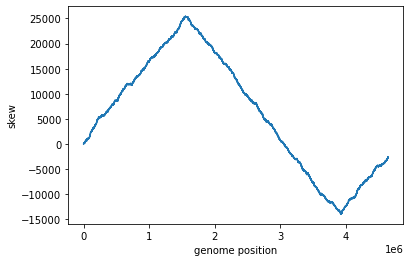

max position =  1550413
min position =  3923620


In [8]:
#### extras

# the skew diagram of e coli 
import matplotlib.pyplot as plt
with open('E_coli.txt') as file:
    genome = file.read()
skew = SkewArray(genome)
plt.plot(skew)
plt.xlabel('genome position')
plt.ylabel('skew')
plt.show()

##To find the position for  the maximum and minimum:
min_val = skew.index(min(skew))

print("max position = " , max_val)
print("min position = " , min_val)

In [ ]:


def MinimumSkew(Genome):
    Positions = []
    Array = SkewArray(Genome)
    min_val = min(Array)
    for i in range(len(Array)):
        if Array[i] == min_val:
            Positions.append(i)
    return Positions


def SkewArray(Genome):
    Skew = []
    Skew.append(0)
    #print(len(Genome))
    #Skew[0] = 0
    for i in range(len(Genome)):
        #print("value of i is",i)
        if Genome[i] == 'C':
            Skew.append(Skew[i] - 1)
            #print(Genome[i], "--C" , Skew[i]  )
        elif Genome[i] == 'G':
            Skew.append(Skew[i] + 1)
            #print(Genome[i], "--G" , Skew[i])
        else:
            Skew.append(Skew[i])
            #print(Genome[i] , "--A or T" , Skew[i])
            
    #plt.plot(Skew[:], marker='o')
    #plt.show()
    return Skew


In [ ]:
Genome = "TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"
print(MinimumSkew(Genome))

## Hamming distance

In [ ]:
###
r'''
We say that position i in k-mers p and q is a mismatch if the symbols at position i of the two 
strings are not the same. The total number of mismatches between strings p and q is called 
the Hamming distance between these strings. 
We will let you implement a function to compute this distance, called HammingDistance(p, q).
r'''



def HammingDistance(p, q):
    length = len(p)
    #print("length of the strings is:" , length)
    count = 0 #count the number of mismatch in the strings
    for i in range(length):
        #print(i)
        if p[i] == q[i] : 
            pass
        else:
            count = count+1

    #print(count)
    return count


In [ ]:
p = "GGGCCGTTGGT"
q = "GGACCGTTGAC"

print(HammingDistance(p, q))

## Approximate Pattern Matching Problem (finds the pattern in a text sequence with certain amount of mismatches)

In [1]:
def HammingDistance(p, q):
    length = len(p)
    #print("length of the strings is:" , length)
    count = 0 #count the number of mismatch in the strings
    for i in range(length):
        #print(i)
        if p[i] == q[i] : 
            pass
        else:
            count = count+1

    #print(count)
    return count

def ApproximatePatternMatching(Text, Pattern, d):
    k = len(Pattern) # k mer
    #print(len(pattern))
    n = len(Text)
    position = []

    for i in range(n - k + 1): # the range is discussed in the previous lession 
        #print(i)
        window = Text[i : i+k]
        #print(window)
        if HammingDistance(window, Pattern) <= d:
            position.append(i)
    #print(position)
    return position
    #print(len(window))

def ApproximatePatternCount(Text, Pattern, d):
    count  = ApproximatePatternMatching(Text, Pattern, d)
    return len(count)



In [2]:
#text = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
#p = 
#pattern = 'ATTCTGGA'
#d = 3

text = "TTTAGAGCCTTCAGAGG"
#p = 
pattern = 'GAGG'
d = 2
print(ApproximatePatternCount(text, pattern, d))

4
